# Case iFood


[Repositório com dados](https://github.com/Victor-cb/case_ifood_aulas.git)

## Objetivos


* Colocar em prática os conhecimentos adquiridos até aqui

* Permitir que cada um avalie sua própria performance detalhadamente

* Introduzir a experiência de case interview em Data Science, método comum em processos seletivos (material baseado em um processo seletivo real)


## Dinâmica

* O case será realizado em duas fases: 
  * (I) entendimento do problema e planejamento;
* (II) Execução 
  * Fase I - Entendimento do Problema e Planejamento (Máximo de 25 min)
  *  Baixar os arquivos na pasta da aula ou repositório
     *  pdf: contém a descrição (em inglês) do case, seus objetivos e informações sobre os dados
     *  csv: base de dados de referência para a realização do case

* Construir um roteiro de análise (planejamento) para solução do problema, individualmente. O roteiro deve ser no formato de 
* Tarefa: Descrição da tarefa
* Sub-tarefa1: Descrição/Justificativa
* Sub-tarefa2: Descrição/Justificativa
* Fase II - Execução (1h:40min)
* Cada aluno terá até 1h:40min para desenvolver a solução do case individualmente
* Ao final do tempo (aprox. às 21h:15min), deverá  anexar sua solução no drive




### Dicas

- Fase I
- Garanta que entendeu o problema, faça uma definição simples e objetiva
- Procure organizar as atividades que irá realizar.

- Fase II
- Comece entendendo o dataset: do que se tratam os dados? Qual a unidade de análise?
- Entenda melhor as features disponíveis
- Verifique se as informações são consistentes
- Que tipo de informação podemos derivar dos dados disponíveis?
- Quais tratamentos podemos realizar?
- Como comunicar nossos achados (storytelling)?


In [44]:
# Descrição da tarefa:
# Vamos analisar o problema
# Queremos entender qual dos clientes são sucetives a promoções.
# Para que o time de marketing consigar fazer promoções mais acertivar e eficazes
# Pois a ultima projeção de empresa não foi muito boa.

In [45]:
# Tarefa 1:
# Entender quais clientes são sucetiveis a promoções.
# Não adianta darmos promoções a clientes que não estão interessados.

In [46]:
# Tarefa 2 
# Ligar as bases de dados pelo ID e entender quais delas estão coorelacionadas com as variáveis binarias de promoção
# Ao entendermos isso podemos saber quais variaveis são importantes para saber quem são os clientes que dão retorno quando são apresentados a promoções.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
# importanto as bases de dados
df_pv_campaign = pd.read_csv('ifood_previous_campaing.csv')
df_people = pd.read_csv('ifood_people.csv')
df_purchase = pd.read_csv('ifood_purchase_profile.csv')

<Axes: >

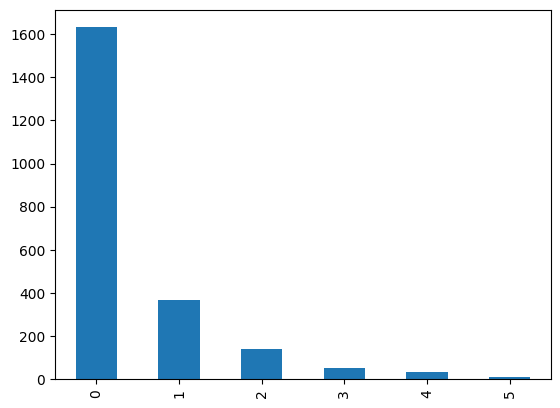

In [49]:
#tarefa 1
df_pv_campaign['Soma de respostas'] = df_pv_campaign['AcceptedCmp1']  + df_pv_campaign['AcceptedCmp2'] + df_pv_campaign['AcceptedCmp3'] + df_pv_campaign['AcceptedCmp4'] + df_pv_campaign['AcceptedCmp5'] + df_pv_campaign['Response']

df_pv_campaign['Soma de respostas'].value_counts().plot(kind='bar')

In [50]:
# como sabemos que só 15% da campanha foi um sucesso, queremos pegar um valor proximo de 15% dos clientes
# se somarmos a quantidade de clientes que responderam a mais de 2 campanhas

#contando numero de linhas com mais de 2 respostas - temos aproximadamente 10% dos clientes, se adicionarmos 1 teremos 27% dos clientes
treshold_respostas = 1
count = 0
for index, row in df_pv_campaign.iterrows():
    if row['Soma de respostas'] >= treshold_respostas:
        count += 1

# vamos trabalhar com 1, pormais que passemos de 15% dos clientes, queremos ter uma margem para que possamos tirar mais clientes depois

# deixando só os clientes que interessam
df_pv_campaign = df_pv_campaign[df_pv_campaign['Soma de respostas'] >= treshold_respostas]

In [51]:
# Tarefa 2

df_geral = pd.merge(df_pv_campaign, df_people, on='ID')
df_geral = pd.merge(df_geral, df_purchase, on='ID')

# jogando fora colunas que não interessam Z_CostContact,Z_Revenue
df_geral.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)


In [52]:
# usando describe para ver se não tem nada estranho
df_geral.describe()

ID  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
count    609.000000    609.000000    609.000000    609.000000    609.000000   
mean    5408.955665      0.267652      0.274220      0.267652      0.236453   
std     3160.003440      0.443099      0.446487      0.443099      0.425253   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     2715.000000      0.000000      0.000000      0.000000      0.000000   
50%     5236.000000      0.000000      0.000000      0.000000      0.000000   
75%     8015.000000      1.000000      1.000000      1.000000      0.000000   
max    11133.000000      1.000000      1.000000      1.000000      1.000000   

       AcceptedCmp2    Complain    Response  Soma de respostas   Year_Birth  \
count    609.000000  609.000000  609.000000         609.000000   609.000000   
mean       0.049261    0.004926    0.548440           1.643678  1968.193760   
std        0.216591    0.070071    0.498057           0.974745    12.593541   
min        0.000000    0.000000    0.000000           1.000000  1899.000000   
25%        0.000000    0.000000    0.000000           1.000000  1958.000000   
50%        0.000000    0.000000    1.000000           1.000000  1969.000000   
75%        0.000000    0.000000    1.000000           2.000000  1977.000000   
max        1.000000    1.000000    1.000000           5.000000  1996.000000   

       ...   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  ...  609.000000       609.000000       609.000000        609.000000   
mean   ...   35.845649       277.275862        52.131363         38.174056   
std    ...   45.024290       276.545477        63.317931         47.579738   
min    ...    0.000000         1.000000         0.000000          0.000000   
25%    ...    3.000000        45.000000         4.000000          2.000000   
50%    ...   19.000000       161.000000        24.000000         18.000000   
75%    ...   50.000000       447.000000        82.000000         55.000000   
max    ...  193.000000      1607.000000       253.000000        198.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count    609.000000         609.000000       609.000000           609.000000   
mean      60.348112           2.218391         5.062397             4.128079   
std       58.351676           1.927960         2.577620             2.913221   
min        0.000000           0.000000         0.000000             0.000000   
25%       20.000000           1.000000         3.000000             1.000000   
50%       38.000000           1.000000         5.000000             4.000000   
75%       80.000000           3.000000         7.000000             6.000000   
max      245.000000          11.000000        11.000000            11.000000   

       NumStorePurchases  NumWebVisitsMonth  
count         609.000000         609.000000  
mean            6.610837           5.034483  
std             3.266348           2.588015  
min             0.000000           0.000000  
25%             4.000000           3.000000  
50%             6.000000           5.000000  
75%             9.000000           7.000000  
max            13.000000          20.000000  

[8 rows x 25 columns]

C:\Users\Gabriel Makhoul\AppData\Local\Temp\ipykernel_23696\3384370168.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_geral.corr(), annot=True, cmap='coolwarm')


<Axes: title={'center': 'Coorelação entre as variaveis'}>

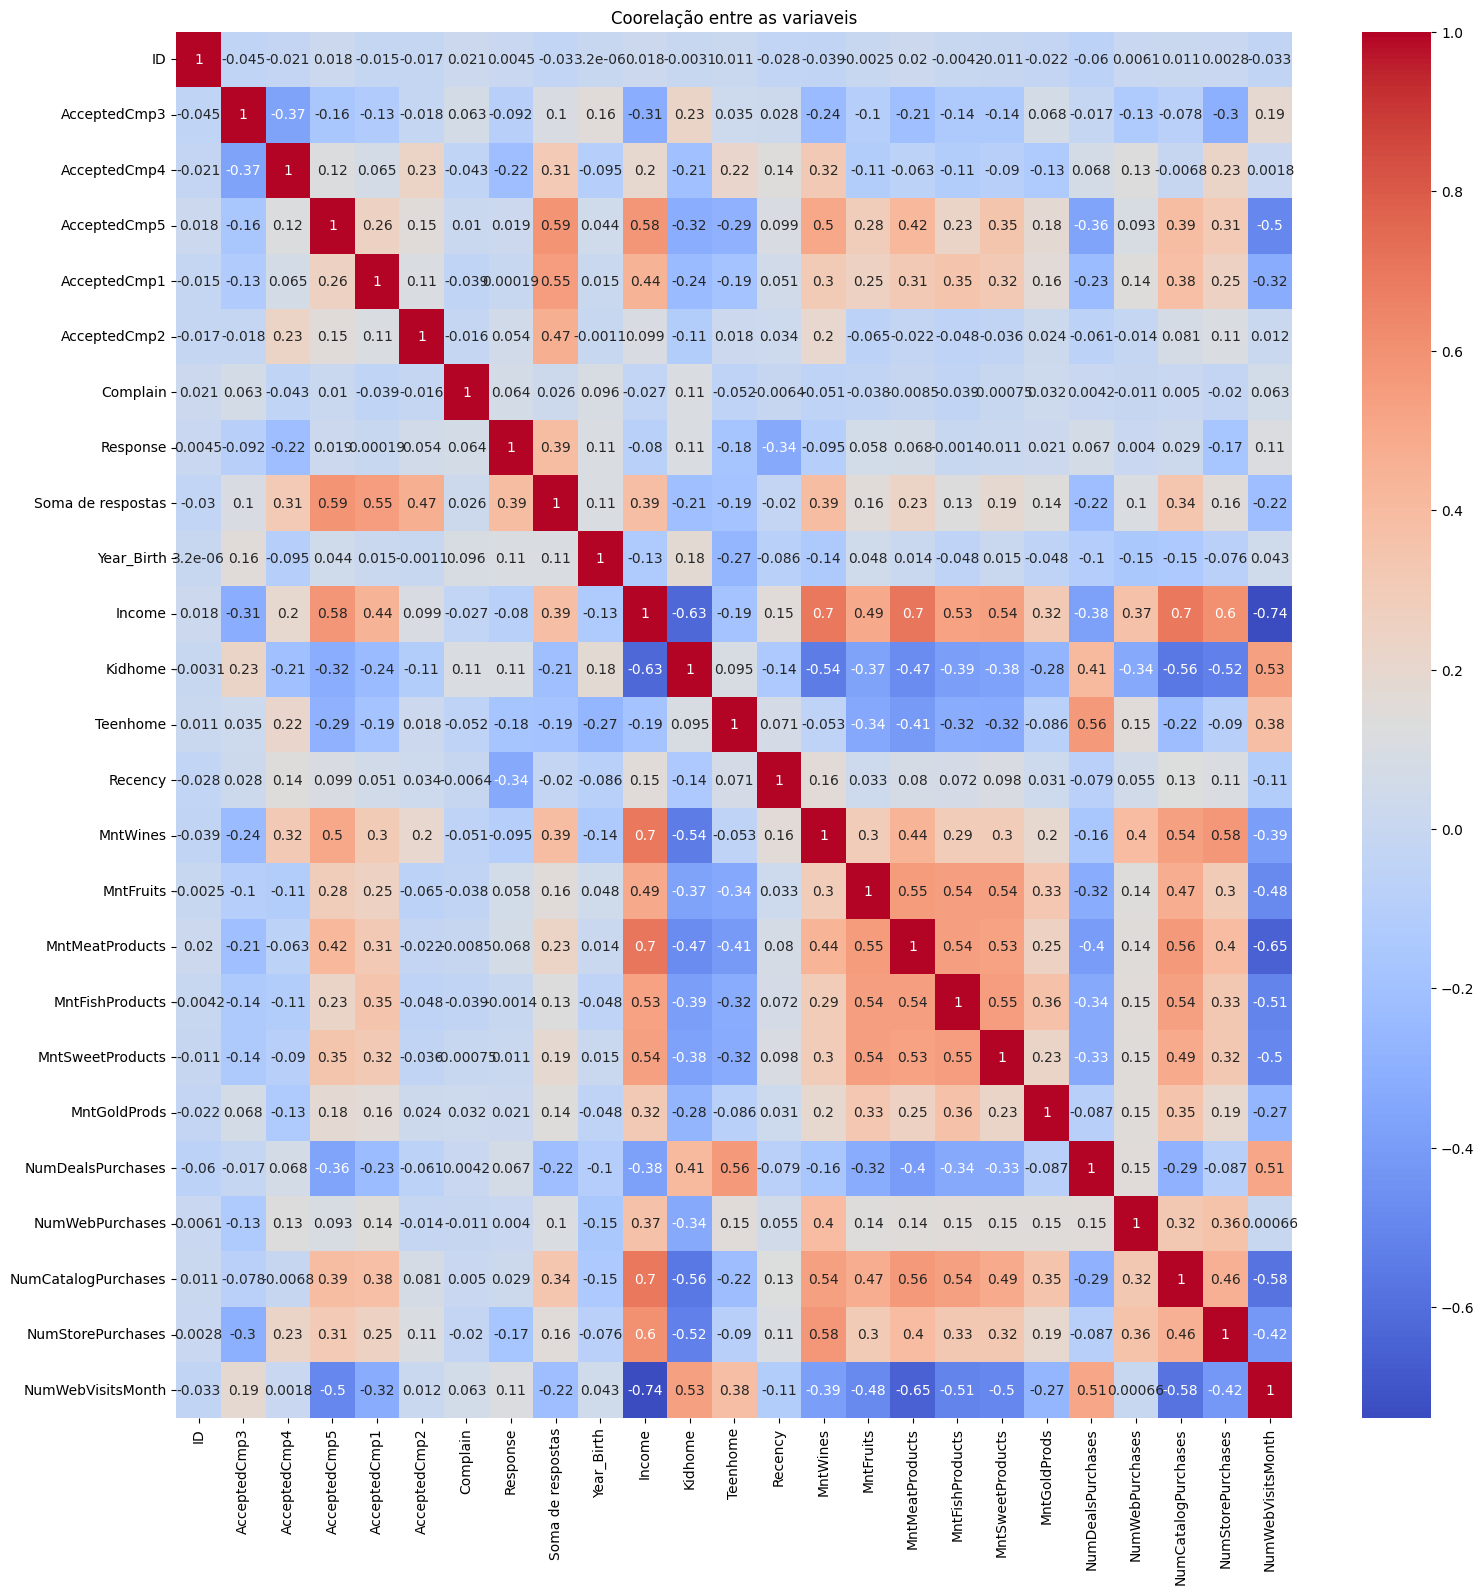

In [53]:
# vamos ver a coorelação entre as variaveis usando o heatmap
plt.figure(figsize=(18,18))

plt.title('Coorelação entre as variaveis')
sns.heatmap(df_geral.corr(), annot=True, cmap='coolwarm')

In [54]:
# só explicand um pouco coorelações perto de 1 são coorelações positivas, ou seja, se uma variavel aumenta a outra tambem aumenta
# coorelações perto de -1 são coorelações negativas, ou seja, se uma variavel aumenta a outra diminui
# a partir de 0.7 já é uma coorelação forte, e 0.3 é uma coorelação fraca, 0.4 é uma coorelação moderada
# a partir do gráfico temos que a soma de respostas a promoções está positivamente coorelacionada com a a renda familiar, a quantidade gasta em vinhos e compras feitas por catalogo
# isso faz com que aparentemente sugiro que o time de marketing foque em pessoas com renda familiar alta, que gastam muito em vinhos e compras por catalogo

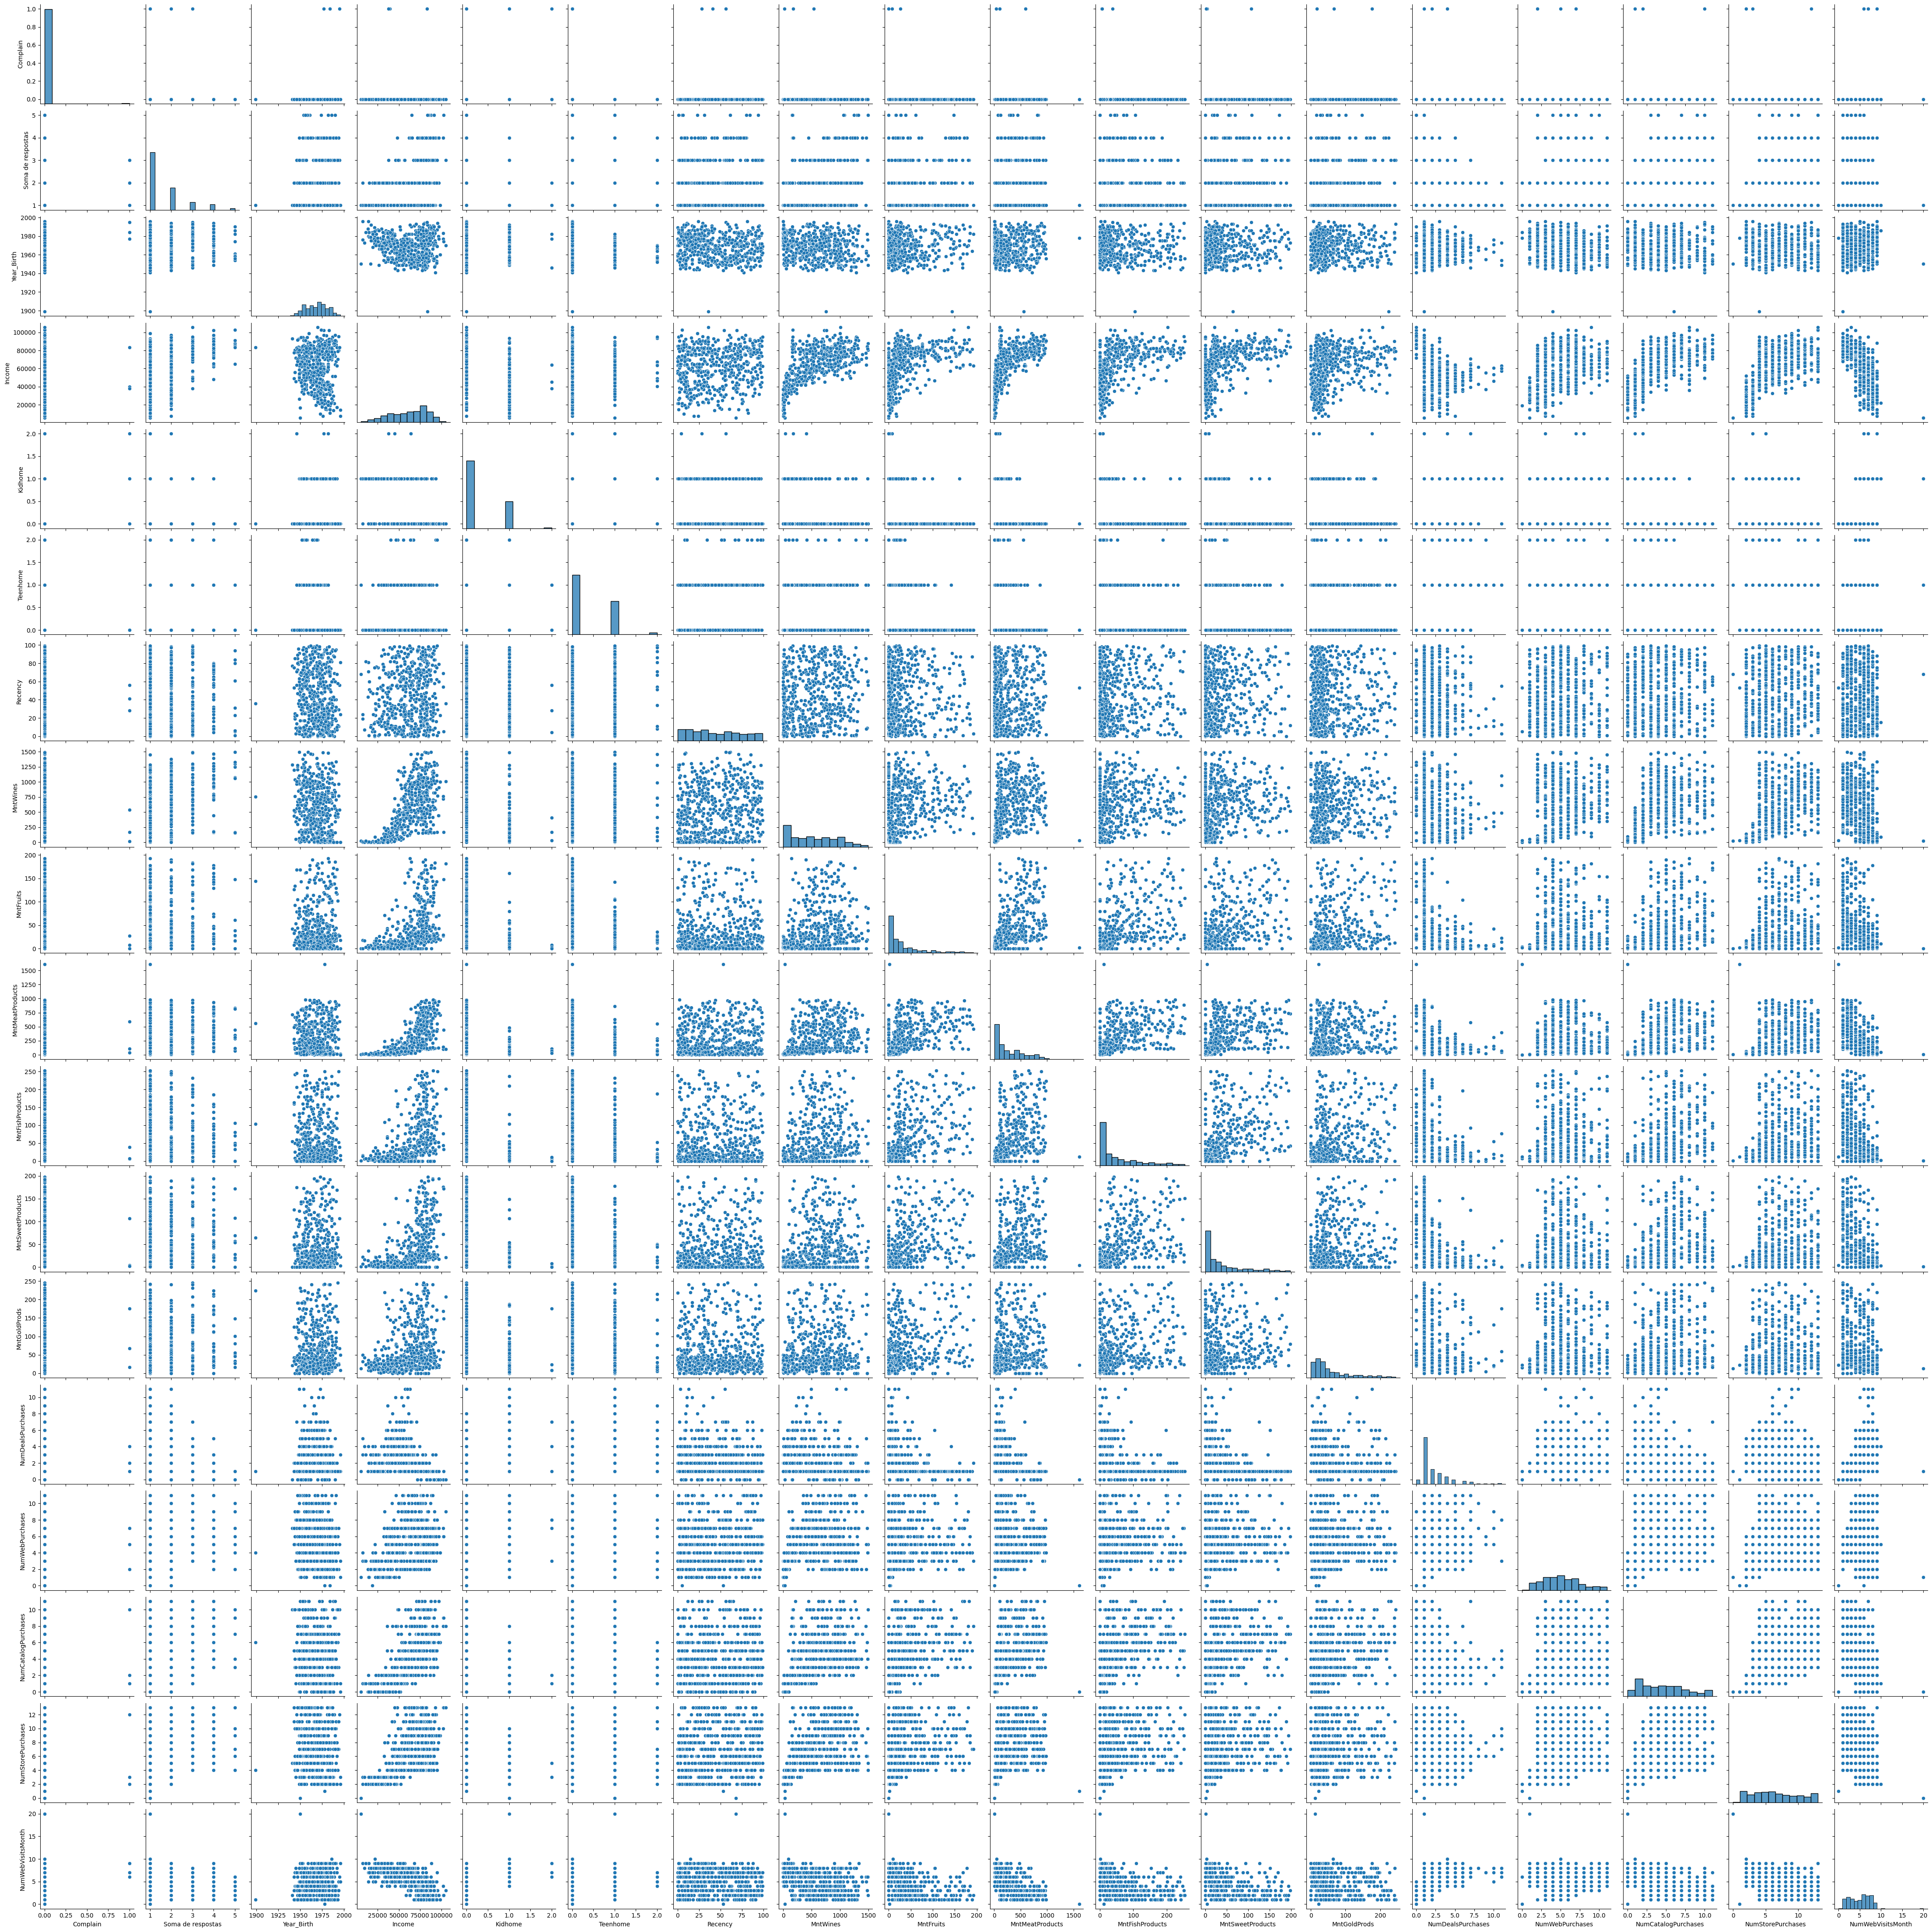

In [55]:
#subset para fazer o pairplot dropando as colunas que não interessam

df_geral_2 = df_geral.drop(['ID','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'], axis=1)

sns.pairplot(df_geral_2)


In [56]:
# lembri de ultima hora do pair plot, que é um gráfico que mostra a relação entre duas variaveis, 
# é um pouco redundante com o heatmap, mas é bom para ver a relação entre duas variaveis e olhar se é possivel fazer algum tipo de regressão.